<a href="https://colab.research.google.com/github/Gustavolorenzz/IA/blob/main/IAEtapa3PrePros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Imports:

In [ ]:
!pip install plotly --upgrade
!pip install kneed # To install only knee-detection algorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 72.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from kneed import DataGenerator, KneeLocator #para mostrar o número de grupos ideal do agrupamento
from sklearn.cluster import KMeans #Importando a função Kmeans
from sklearn.preprocessing import StandardScaler #Função utilizada para normalização dos dados
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler #Função utilizada para normalização dos dados

Trazendo base do arquivo CSV

In [ ]:
base = pd.read_csv('https://raw.githubusercontent.com/Gustavolorenzz/IA/main/Bases/student-por.csv', sep=';')
base

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


Pré-processamentos:

Primeira Etapa:Redução de dimensionalidade

In [ ]:
colunas_desejadas = ['absences','failures', 'higher','G1','G2','G3']
base = base[colunas_desejadas]
base

,absences,failures,higher,G1,G2,G3
0,4,0,yes,0,11,11
1,2,0,yes,9,11,11
2,6,0,yes,12,13,12
3,0,0,yes,14,14,14
4,0,0,yes,11,13,13
...,...,...,...,...,...,...
644,4,1,yes,10,11,10
645,4,0,yes,15,15,16
646,6,0,yes,11,12,9
647,6,0,yes,10,10,10


Segunda Etapa:Discretização de certos atributos

In [ ]:
def mapear_qualificacao(nota):
    if nota >= 15.5:
        return 'Excellent'
    elif nota >= 9.5:
        return 'Sufficient'
    else:
        return 'Poor'

# Aplicar a função às colunas G1, G2 e G3
base['G3'] = base['G3'].apply(mapear_qualificacao)

<ipython-input-102-f176b5a7b104>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['G3'] = base['G3'].apply(mapear_qualificacao)


In [ ]:
def mapear_faltas(absences):
  if absences >= 10:
    return 'High level of absences'
  elif absences >= 5:
    return 'Medium level of absences'
  else:
    return 'Low level of absences'


#Aplicar função à coluna absences
base['absences'] = base['absences'].apply(mapear_faltas)

<ipython-input-103-e12f6758e153>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['absences'] = base['absences'].apply(mapear_faltas)


In [ ]:
def mapear_bombas(failures):
  if(failures > 0):
    return 'Has failed before'
  else:
    return 'No fails'

#Aplicar função à coluna failures
base['failures'] = base['failures'].apply(mapear_bombas)

<ipython-input-104-11375b6f022c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['failures'] = base['failures'].apply(mapear_bombas)


In [ ]:
base

,absences,failures,higher,G1,G2,G3
0,Low level of absences,No fails,yes,0,11,Sufficient
1,Low level of absences,No fails,yes,9,11,Sufficient
2,Medium level of absences,No fails,yes,12,13,Sufficient
3,Low level of absences,No fails,yes,14,14,Sufficient
4,Low level of absences,No fails,yes,11,13,Sufficient
...,...,...,...,...,...,...
644,Low level of absences,Has failed before,yes,10,11,Sufficient
645,Low level of absences,No fails,yes,15,15,Excellent
646,Medium level of absences,No fails,yes,11,12,Poor
647,Medium level of absences,No fails,yes,10,10,Sufficient


Terceira Etapa:

Eliminação de registros redundantes

In [14]:
base3 = base.to_numpy()
unique_rows = np.unique(base3.astype(str), axis=0)
unique_rows.shape

(264, 6)

In [15]:
ur = unique_rows[:,3:5].astype(int)
df = pd.DataFrame(ur,columns =['G1','G2'],dtype = object)
df2 = pd.DataFrame(unique_rows[:,5],columns=['G3'],dtype = object)
df = df.join(df2)
df

,G1,G2,G3
0,10,11,Sufficient
1,10,9,Poor
2,6,7,Poor
3,7,8,Poor
4,8,11,Sufficient
...,...,...,...
259,9,10,Sufficient
260,9,11,Sufficient
261,9,8,Sufficient
262,9,9,Poor


In [16]:
Entrada = df.iloc[:, 0:2].values
Entrada.shape

(264, 2)

In [17]:
scaler = MinMaxScaler()
Entrada = scaler.fit_transform(Entrada)

In [18]:
#K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente
kmeans = KMeans(n_clusters=3, random_state=0)
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
saida_kmeans = kmeans.fit_predict(Entrada)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


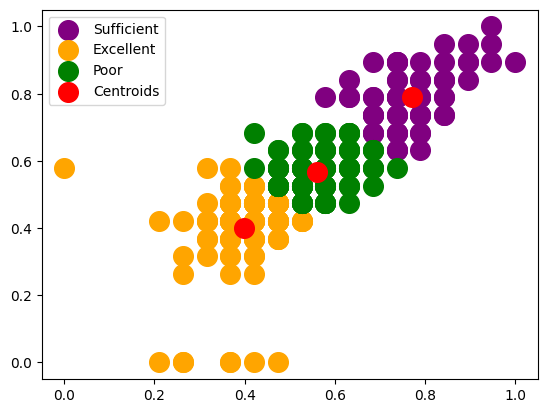

In [19]:
#Visualising the clusters
plt.scatter(Entrada[saida_kmeans == 0, 0], Entrada[saida_kmeans == 0, 1], s = 200, c = 'purple', label = 'Sufficient')
plt.scatter(Entrada[saida_kmeans == 1, 0], Entrada[saida_kmeans == 1, 1], s = 200, c = 'orange', label = 'Excellent')
plt.scatter(Entrada[saida_kmeans == 2, 0], Entrada[saida_kmeans == 2, 1], s = 200, c = 'green', label = 'Poor')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'red', label = 'Centroids')
plt.legend()

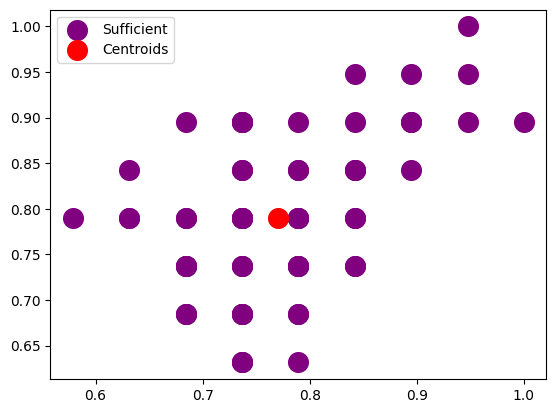

In [20]:
plt.scatter(Entrada[saida_kmeans == 0, 0], Entrada[saida_kmeans == 0, 1], s = 200, c = 'purple', label = 'Sufficient')
plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0,1], s = 200, c = 'red', label = 'Centroids')
plt.legend()

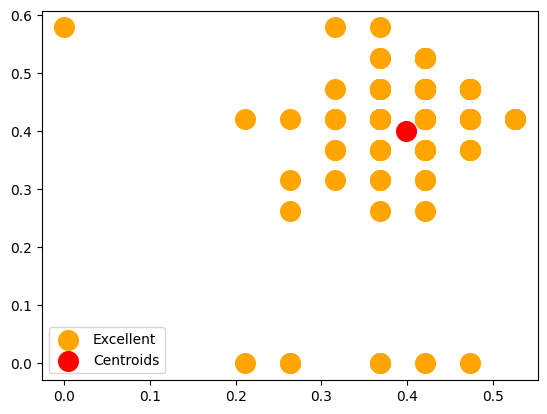

In [21]:
plt.scatter(Entrada[saida_kmeans == 1, 0], Entrada[saida_kmeans == 1, 1], s = 200, c = 'orange', label = 'Excellent')
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1,1], s = 200, c = 'red', label = 'Centroids')
plt.legend()

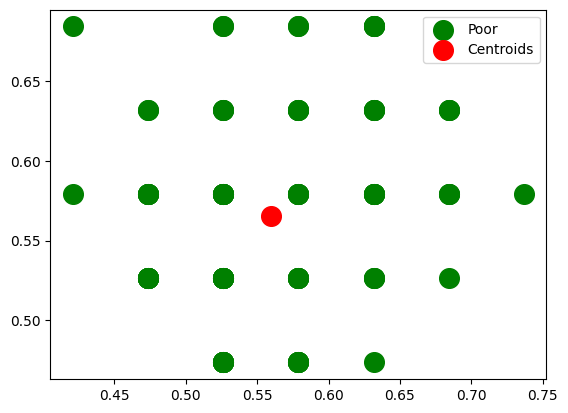

In [22]:
plt.scatter(Entrada[saida_kmeans == 2, 0], Entrada[saida_kmeans == 2, 1], s = 200, c = 'green', label = 'Poor')
plt.scatter(kmeans.cluster_centers_[2, 0], kmeans.cluster_centers_[2,1], s = 200, c = 'red', label = 'Centroids')
plt.legend()

In [23]:
# Determinando a Silhouette para número máximo de cluster estimado (Raiz(instâncias/2)
limit = int((Entrada.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(Entrada)
    pred = model.predict(Entrada)
    score = silhouette_score(Entrada, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score k = 2: 0.537


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score k = 3: 0.422


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score k = 4: 0.452


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score k = 5: 0.398


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score k = 6: 0.368


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score k = 7: 0.337


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score k = 8: 0.365


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score k = 9: 0.359


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score k = 10: 0.369
Silhouette Score k = 11: 0.372


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
